<a href="https://colab.research.google.com/github/YahiaML/SQL_Udacity_Course/blob/main/Unit_3_SQL_Aggregations_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sqlite3
import pandas as pd

In [2]:
db = sqlite3.connect('/content/parch_and_posey.db')

# **L_1:** SUM

A NULL value is different from a zero value or a field that contains spaces. A field with a NULL value is one that has been left blank during record creation

In [3]:
SQL_code = '''
SELECT SUM(poster_qty) poster_qty_sum, SUM(standard_qty ) standard_qty_sum, SUM(total_amt_usd) total_amt_usd_sum
FROM orders 
'''

code_execution = db.execute(SQL_code)

for row in code_execution:
  print(row)

(723646, 1938346, 23141511.830000006)


# **L_2:** MIN, MAX, & AVERAGE


In [4]:
SQL_code = '''
SELECT MIN(occurred_at) 
FROM orders 
'''

code_execution = db.execute(SQL_code)

for row in code_execution:
  print(row)

('2013-12-04 04:22:44',)


In [5]:
SQL_code = '''
SELECT MAX(occurred_at)
FROM web_events
'''

code_execution = db.execute(SQL_code)

for row in code_execution:
  print(row)

('2017-01-01 23:51:09',)


In [6]:
SQL_code = '''
SELECT AVG(standard_qty) mean_standard
FROM orders
'''

code_execution = db.execute(SQL_code)

for row in code_execution:
  print(row)

(280.43200231481484,)


# **L_3:** GROUP BY

A NULL value is different from a zero value or a field that contains spaces. A field with a NULL value is one that has been left blank during record creation

In [7]:
SQL_code = '''
SELECT w.channel, COUNT(*)
FROM web_events w
GROUP BY w.channel
'''

code_execution = db.execute(SQL_code)

for row in code_execution:
  print(row)

('adwords', 906)
('banner', 476)
('direct', 5298)
('facebook', 967)
('organic', 952)
('twitter', 474)


In [8]:
SQL_code = '''
SELECT R.name region_name ,W.channel, COUNT(W.occurred_at) num_of_occurrences
FROM web_events W

JOIN accounts A     ON W.account_id   = A.id

JOIN sales_reps SR  ON A.sales_rep_id = SR.id

JOIN region R       ON SR.region_id   = R.id

GROUP BY R.name, W.channel
ORDER BY num_of_occurrences DESC

'''

code_execution = db.execute(SQL_code)

for row in code_execution:
  print(row)

('Northeast', 'direct', 1800)
('Southeast', 'direct', 1548)
('West', 'direct', 1254)
('Midwest', 'direct', 696)
('Northeast', 'facebook', 335)
('Northeast', 'organic', 317)
('Northeast', 'adwords', 300)
('Southeast', 'facebook', 278)
('Southeast', 'organic', 275)
('Southeast', 'adwords', 264)
('West', 'organic', 243)
('West', 'adwords', 241)
('West', 'facebook', 229)
('Northeast', 'banner', 155)
('Northeast', 'twitter', 154)
('Southeast', 'banner', 146)
('Southeast', 'twitter', 127)
('Midwest', 'facebook', 125)
('West', 'twitter', 122)
('Midwest', 'organic', 117)
('West', 'banner', 116)
('Midwest', 'adwords', 101)
('Midwest', 'twitter', 71)
('Midwest', 'banner', 59)


We can use numbers instead of columns names in GROUP BY and ORDER BY

In [21]:
SQL_code = '''
SELECT R.name region_name ,W.channel, COUNT(W.occurred_at) num_of_occurrences
FROM web_events W

JOIN accounts A     ON W.account_id   = A.id

JOIN sales_reps SR  ON A.sales_rep_id = SR.id

JOIN region R       ON SR.region_id   = R.id

GROUP BY 1, 2
ORDER BY 3 DESC

'''

code_execution = db.execute(SQL_code)

for row in code_execution:
  print(row)

('Northeast', 'direct', 1800)
('Southeast', 'direct', 1548)
('West', 'direct', 1254)
('Midwest', 'direct', 696)
('Northeast', 'facebook', 335)
('Northeast', 'organic', 317)
('Northeast', 'adwords', 300)
('Southeast', 'facebook', 278)
('Southeast', 'organic', 275)
('Southeast', 'adwords', 264)
('West', 'organic', 243)
('West', 'adwords', 241)
('West', 'facebook', 229)
('Northeast', 'banner', 155)
('Northeast', 'twitter', 154)
('Southeast', 'banner', 146)
('Southeast', 'twitter', 127)
('Midwest', 'facebook', 125)
('West', 'twitter', 122)
('Midwest', 'organic', 117)
('West', 'banner', 116)
('Midwest', 'adwords', 101)
('Midwest', 'twitter', 71)
('Midwest', 'banner', 59)


# **L_4:** SELECT DISTINCT

used to return only distinct (different) values

In [9]:
SQL_code = '''
SELECT DISTINCT id, name
FROM sales_reps
LIMIT 10
'''

code_execution = db.execute(SQL_code)

for row in code_execution:
  print(row)

(321500, 'Samuel Racine')
(321510, 'Eugena Esser')
(321520, 'Michel Averette')
(321530, 'Renetta Carew')
(321540, 'Cara Clarke')
(321550, 'Lavera Oles')
(321560, 'Elba Felder')
(321570, 'Shawanda Selke')
(321580, 'Sibyl Lauria')
(321590, 'Necole Victory')


In [10]:
SQL_code = '''
SELECT R.name region_name ,W.channel, COUNT(W.occurred_at) num_of_occurrences
FROM web_events W

JOIN accounts A     ON W.account_id   = A.id

JOIN sales_reps SR  ON A.sales_rep_id = SR.id

JOIN region R       ON SR.region_id   = R.id

GROUP BY R.name, W.channel
ORDER BY num_of_occurrences DESC

'''

code_execution = db.execute(SQL_code)

for row in code_execution:
  print(row)

('Northeast', 'direct', 1800)
('Southeast', 'direct', 1548)
('West', 'direct', 1254)
('Midwest', 'direct', 696)
('Northeast', 'facebook', 335)
('Northeast', 'organic', 317)
('Northeast', 'adwords', 300)
('Southeast', 'facebook', 278)
('Southeast', 'organic', 275)
('Southeast', 'adwords', 264)
('West', 'organic', 243)
('West', 'adwords', 241)
('West', 'facebook', 229)
('Northeast', 'banner', 155)
('Northeast', 'twitter', 154)
('Southeast', 'banner', 146)
('Southeast', 'twitter', 127)
('Midwest', 'facebook', 125)
('West', 'twitter', 122)
('Midwest', 'organic', 117)
('West', 'banner', 116)
('Midwest', 'adwords', 101)
('Midwest', 'twitter', 71)
('Midwest', 'banner', 59)


# **L_5:** HAVING

It was added to SQL because the WHERE keyword cannot be used with aggregate functions (count, sum, min, ...etc.).

In [11]:
SQL_code = '''
SELECT SR.name rep_name, COUNT(A.name) as number_of_accounts
FROM accounts A    
JOIN sales_reps SR  ON A.sales_rep_id = SR.id
GROUP BY rep_name
HAVING COUNT(A.name) > 5
LIMIT 10
'''

code_execution = db.execute(SQL_code)

for row in code_execution:
  print(row)

('Arica Stoltzfus', 10)
('Babette Soukup', 7)
('Brandie Riva', 10)
('Calvin Ollison', 11)
('Charles Bidwell', 7)
('Cliff Meints', 7)
('Dawna Agnew', 9)
('Debroah Wardle', 6)
('Delilah Krum', 8)
('Derrick Boggess', 7)


In [12]:
SQL_code = '''
SELECT R.name region_name ,W.channel, COUNT(W.occurred_at) num_of_occurrences
FROM web_events W

JOIN accounts A     ON W.account_id   = A.id

JOIN sales_reps SR  ON A.sales_rep_id = SR.id

JOIN region R       ON SR.region_id   = R.id

GROUP BY R.name, W.channel
ORDER BY num_of_occurrences DESC

'''

code_execution = db.execute(SQL_code)

for row in code_execution:
  print(row)

('Northeast', 'direct', 1800)
('Southeast', 'direct', 1548)
('West', 'direct', 1254)
('Midwest', 'direct', 696)
('Northeast', 'facebook', 335)
('Northeast', 'organic', 317)
('Northeast', 'adwords', 300)
('Southeast', 'facebook', 278)
('Southeast', 'organic', 275)
('Southeast', 'adwords', 264)
('West', 'organic', 243)
('West', 'adwords', 241)
('West', 'facebook', 229)
('Northeast', 'banner', 155)
('Northeast', 'twitter', 154)
('Southeast', 'banner', 146)
('Southeast', 'twitter', 127)
('Midwest', 'facebook', 125)
('West', 'twitter', 122)
('Midwest', 'organic', 117)
('West', 'banner', 116)
('Midwest', 'adwords', 101)
('Midwest', 'twitter', 71)
('Midwest', 'banner', 59)


# **L_6:** DATE_TRUNC

used to truncate a date or datetime value to the start of a given unit of duration. Takes two arguments, the date to truncate and the unit of duration.

**unit of duration** ( "century", "decade", "year", "quarter", "month", "week", "day", "hour", "minute", "second", or "millisecond")

$NOTE:$ DATE_TRUNC can not be used in colab for unknown reason

In [18]:
#SQL_code = '''
#SELECT DATE_TRUNC('year', occurred_at) Year_ , SUM(total_amt_usd) 
#FROM orders
#GROUP BY Year_
#ORDER BY Year_

#'''

#code_execution = db.execute(SQL_code)

#for row in code_execution:
#  print(row)

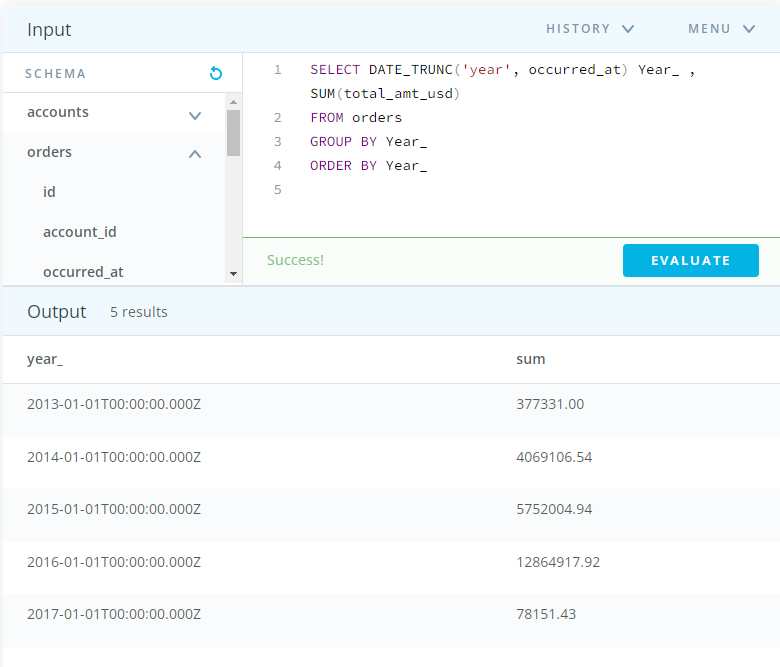

# **L_7:** DATE_PART

**unit of duration** ( "century", "decade", "year", "quarter", "month", "week", "day", "hour", "minute", "second", or "millisecond", dow, doy, epoch, isodow, isoyear, timezone, timezone_hour ,timezone_minute)


In [20]:
#SQL_code = '''
#SELECT A.name, DATE_PART('year', O.occurred_at) year_, DATE_PART('month', O.occurred_at) month_ , SUM(O.gloss_amt_usd) 
#FROM orders O
#JOIN accounts A ON O.account_id = A.id
#WHERE A.name = 'Walmart'
#GROUP BY 1,2,3
#ORDER BY 4 DESC
#LIMIT 1
#'''
#
#code_execution = db.execute(SQL_code)
#
#for row in code_execution:
#  print(row)

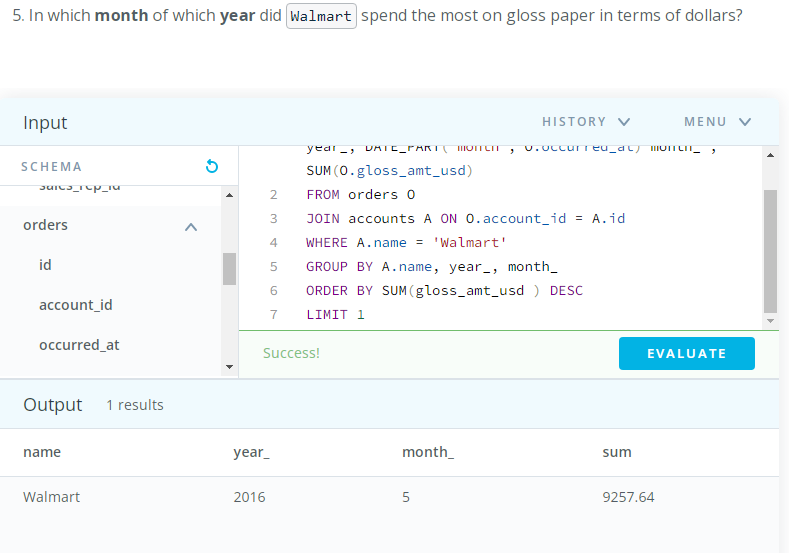